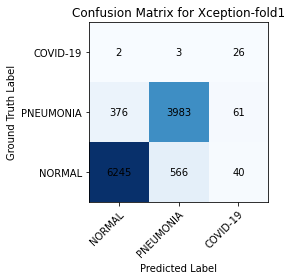

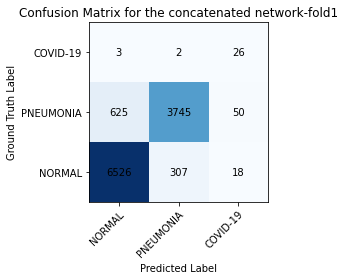

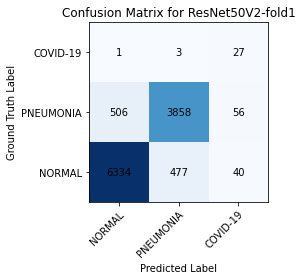

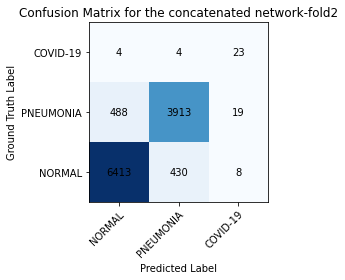

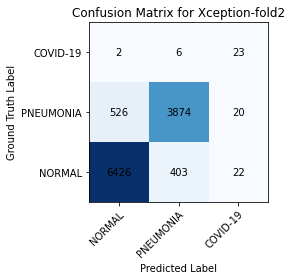

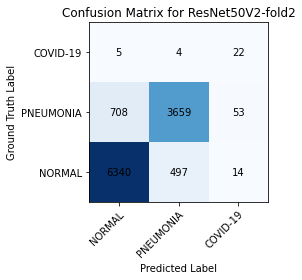

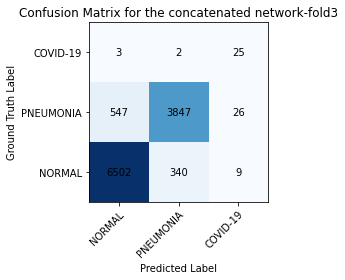

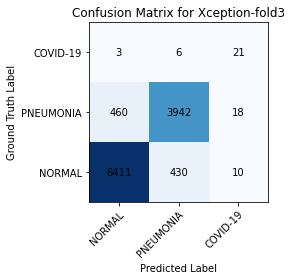

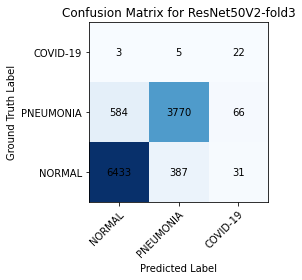

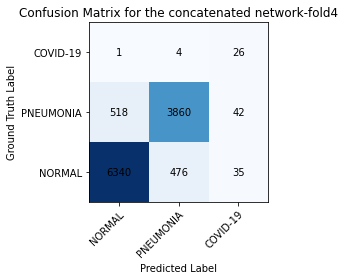

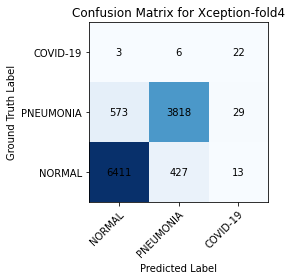

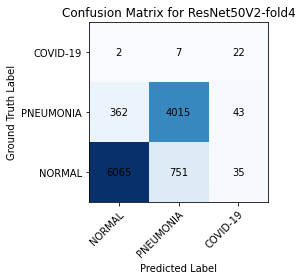

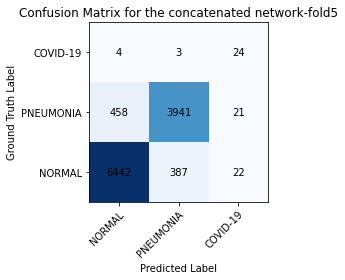

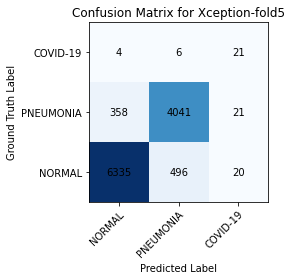

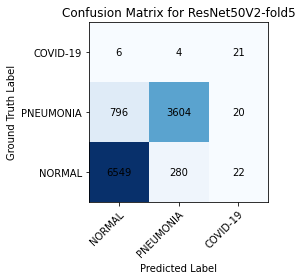

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
array=[['wrong_covid_normal','wrong_covid_pneu','correct_covid'],
       ['wrong_pneu_normal','correct_pneu','wrong_pneu_covid'],
       ['correct_normal','wrong_normal_pneu','wrong_normal_covid']]
results={1:{},2:{},3:{},4:{},5:{}}
for fo in range(1,6):
    report=pd.read_excel('/content/drive/MyDrive/results/selected_fold{}.xlsx'.format(fo))
    data={}
    for index,item in report.iterrows():
        images_num=item['tp']+item['fp']
        data[item['name']]=[[],[],[]]
        acc=item['tp']/(item['tp']+item['fp'])
        covid_recall=item['correct_covid']/item['covid_num']
        covid_Specificity=(images_num-item['covid_num']-item['wrong_covid'])/(images_num-item['covid_num']-item['wrong_covid']+item['wrong_covid'])
        covid_accuracy=(images_num-item['covid_num']-item['wrong_covid']+item['correct_covid'])/(images_num-item['covid_num']-item['wrong_covid']+item['correct_covid']+item['wrong_covid']+item['not_detected_covid'])
        
        pneu_recall=item['correct_pneu']/item['pneu_num']
        pneu_Specificity=(images_num-item['pneu_num']-item['wrong_pneu'])/(images_num-item['pneu_num']-item['wrong_pneu']+item['wrong_pneu'])
        pneu_accuracy=(images_num-item['pneu_num']-item['wrong_pneu']+item['correct_pneu'])/(images_num-item['pneu_num']-item['wrong_pneu']+item['correct_pneu']+item['wrong_pneu']+item['not_detected_pneu'])
        
        normal_recall=item['correct_normal']/item['normal_num']
        normal_Specificity=(images_num-item['normal_num']-item['wrong_normal'])/(images_num-item['normal_num']-item['wrong_normal']+item['wrong_normal'])
        normal_accuracy=(images_num-item['normal_num']-item['wrong_normal']+item['correct_normal'])/(images_num-item['normal_num']-item['wrong_normal']+item['correct_normal']+item['wrong_normal']+item['not_detected_normal'])
        
        results[fo][item['name']]={'acc':acc,'covid_recall':covid_recall,'covid_Specificity':covid_Specificity,
                               'covid_accuracy':covid_accuracy,'pneu_recall':pneu_recall,'pneu_Specificity':pneu_Specificity,
                               'pneu_accuracy':pneu_accuracy,
                               'normal_recall':normal_recall,'normal_Specificity':normal_Specificity,
                               'normal_accuracy':normal_accuracy}
        for nn,aa in enumerate(array):
            for a in aa:
                data[item['name']][nn].append(item[a])
             
    
    for key in data:
        gt = ['NORMAL','PNEUMONIA','COVID-19']
        preds = ["COVID-19", "PNEUMONIA", "NORMAL",] 
        fig, ax = plt.subplots()
        im = ax.imshow(np.array(data[key]), interpolation='nearest', cmap=plt.cm.Blues)
        index=key.find('-')
        if 'concatenat' in key:
            ax.set(xticks=np.arange(np.array(data[key]).shape[1]),
               yticks=np.arange(np.array(data[key]).shape[0]),
               # ... and label them with the respective list entries
               xticklabels=gt, yticklabels=preds,
               title='Confusion Matrix for the concatenated network-fold{}'.format(fo),
               ylabel='Ground Truth Label',
               xlabel='Predicted Label') 
        else:
            ax.set(xticks=np.arange(np.array(data[key]).shape[1]),
               yticks=np.arange(np.array(data[key]).shape[0]),
               # ... and label them with the respective list entries
               xticklabels=gt, yticklabels=preds,
               title='Confusion Matrix for {}-fold{}'.format(key[:index],fo),
               ylabel='Ground Truth Label',
               xlabel='Predicted Label')
        
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")
        
        fmt = '.2f'
        thresh = 1000000.
        # Loop over data dimensions and create text annotations.
        for i in range(len(gt)):
            for j in range(len(preds)):
                    ax.text(j, i, format(np.array(data[key])[i, j]),
                            ha="center", va="center",
                            color="white" if np.array(data[key])[i, j] > thresh else "black")
        fig.tight_layout()
        
        #plt.show()
        dash=key.find('-')
        plt.savefig('{}-fold{}-confusion_matrix.pdf'.format(key[:dash],fo))
        
results['Full']={'Xception':{}, 'concatenate':{},'ResNet50V2':{}}
results['average']={'Xception':{}, 'concatenate':{},'ResNet50V2':{}}
nets=['Xception','ResNet50V2','concatenate']
for net in nets:
    for fokey in results:
        for netkey in results[fokey]:
            if net in netkey:
                for param in results[fokey][netkey]:
                    if param not in results['Full'][net]:
                        results['Full'][net][param]=[]
                    results['Full'][net][param].append(results[fokey][netkey][param])


for net in results['Full']:
    for param in results['Full'][net]:
        results['average'][net][param]=np.average(results['Full'][net][param][:-1])
        
temp_data=[]
for fo in [1,2,3,4,5,'average']:
    for net in results[fo]:
        if 'Xception' in net:
            temp_data.append([results[fo][net]['covid_Specificity'],
                              results[fo][net]['pneu_Specificity'],
                              results[fo][net]['normal_Specificity'],
                              results[fo][net]['covid_accuracy'],
                              results[fo][net]['pneu_accuracy'],
                              results[fo][net]['normal_accuracy']])    
    for net in results[fo]:
        if 'ResNet' in net:
            temp_data.append([results[fo][net]['covid_Specificity'],
                              results[fo][net]['pneu_Specificity'],
                              results[fo][net]['normal_Specificity'],
                              results[fo][net]['covid_accuracy'],
                              results[fo][net]['pneu_accuracy'],
                              results[fo][net]['normal_accuracy']])
    for net in results[fo]:
        if 'oncatenat' in net:
            temp_data.append([results[fo][net]['covid_Specificity'],
                              results[fo][net]['pneu_Specificity'],
                              results[fo][net]['normal_Specificity'],
                              results[fo][net]['covid_accuracy'],
                              results[fo][net]['pneu_accuracy'],
                              results[fo][net]['normal_accuracy']])            
                        
             
